In [1]:
import pandas as pd
from folium.plugins import HeatMap
import folium
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os 
filepath = os.path.join(os.getcwd(), 'dataset_grad_pres.csv')

In [3]:
df_completo = pd.read_csv(filepath, engine='python', 
                     on_bad_lines='warn', encoding='iso-8859-1', header=0, sep = ";")

In [4]:
df_completo.keys()

Index(['ANO_INGRESSO', 'SEMESTRE_INGRESSO', 'TIPO_INGRESSO', 'COTA',
       'CURSO_NOME', 'AREA', 'SITUACAO', 'MOTIVO_SAIDA', 'CAMPUS', 'TURNO',
       'ETNIA', 'SEXO', 'TIPOCURSO', 'LNG', 'LAT', 'LOCAL', 'LNG_ORGM',
       'LAT_ORGM', 'LOCAL_ORGM'],
      dtype='object')

In [5]:
# Inclui no final do DataFrame df_completo as colunas:
# Baixa renda; Escola pública; Etnia; PPI; PCD
# e preenche seus valores com "Sim" ou "Não", de acordo com a tabela acima

def classificar_baixa_renda(cota):
    baixa_renda_categorias = ["Grupo A", "Grupo A1", "Grupo B", "Grupo B1"]

    if cota in baixa_renda_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['Baixa renda'] = df_completo['COTA'].apply(classificar_baixa_renda)

def classificar_escola_publica(cota):
    escola_publica_categorias = ["Grupo A", "Grupo A1", "Grupo B", "Grupo B1", "Grupo D", "Grupo D1", "Grupo E", "Grupo E1"]

    if cota in escola_publica_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['Escola pública'] = df_completo['COTA'].apply(classificar_escola_publica)

def classificar_etnia_PPI(cota):
    etnia_ppi_categorias = ["Grupo A", "Grupo A1", "Grupo D", "Grupo D1"]

    if cota in etnia_ppi_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['Etnia PPI'] = df_completo['COTA'].apply(classificar_etnia_PPI)

def classificar_PCD(cota):
    pcd_categorias = ["Grupo A1", "Grupo B1", "Grupo D1", "Grupo E1"]

    if cota in pcd_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['PCD'] = df_completo['COTA'].apply(classificar_PCD)


In [6]:
df_completo['LAT'] = df_completo['LAT'].str.replace(',', '.').astype(float)
df_completo['LNG'] = df_completo['LNG'].str.replace(',', '.').astype(float)
df_completo['LAT_ORGM'] = df_completo['LAT_ORGM'].str.replace(',', '.').astype(float)
df_completo['LNG_ORGM'] = df_completo['LNG_ORGM'].str.replace(',', '.').astype(float)
df_completo['LAT'] = pd.to_numeric(df_completo['LAT'])
df_completo['LNG'] = pd.to_numeric(df_completo['LNG'])
df_completo['LAT_ORGM'] = pd.to_numeric(df_completo['LAT_ORGM'])
df_completo['LNG_ORGM'] = pd.to_numeric(df_completo['LNG_ORGM'])

In [7]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64540 entries, 0 to 64539
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO_INGRESSO       64540 non-null  int64  
 1   SEMESTRE_INGRESSO  64540 non-null  int64  
 2   TIPO_INGRESSO      64540 non-null  object 
 3   COTA               61827 non-null  object 
 4   CURSO_NOME         64540 non-null  object 
 5   AREA               64540 non-null  object 
 6   SITUACAO           64540 non-null  object 
 7   MOTIVO_SAIDA       64540 non-null  object 
 8   CAMPUS             64540 non-null  object 
 9   TURNO              64540 non-null  object 
 10  ETNIA              62332 non-null  object 
 11  SEXO               64540 non-null  object 
 12  TIPOCURSO          64540 non-null  object 
 13  LNG                62493 non-null  float64
 14  LAT                62493 non-null  float64
 15  LOCAL              64540 non-null  object 
 16  LNG_ORGM           419

In [8]:
df_evadidos = df_completo[df_completo['SITUACAO'].str.lower() == 'evadido']
df_evadidos.info('LOCAL_ORGM')

<class 'pandas.core.frame.DataFrame'>
Index: 22967 entries, 0 to 64538
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO_INGRESSO       22967 non-null  int64  
 1   SEMESTRE_INGRESSO  22967 non-null  int64  
 2   TIPO_INGRESSO      22967 non-null  object 
 3   COTA               21780 non-null  object 
 4   CURSO_NOME         22967 non-null  object 
 5   AREA               22967 non-null  object 
 6   SITUACAO           22967 non-null  object 
 7   MOTIVO_SAIDA       22967 non-null  object 
 8   CAMPUS             22967 non-null  object 
 9   TURNO              22967 non-null  object 
 10  ETNIA              21134 non-null  object 
 11  SEXO               22967 non-null  object 
 12  TIPOCURSO          22967 non-null  object 
 13  LNG                22425 non-null  float64
 14  LAT                22425 non-null  float64
 15  LOCAL              22967 non-null  object 
 16  LNG_ORGM           14005 no

In [9]:
df_evadidos

,ANO_INGRESSO,SEMESTRE_INGRESSO,TIPO_INGRESSO,COTA,CURSO_NOME,AREA,SITUACAO,MOTIVO_SAIDA,CAMPUS,TURNO,...,LNG,LAT,LOCAL,LNG_ORGM,LAT_ORGM,LOCAL_ORGM,Baixa renda,Escola pública,Etnia PPI,PCD
0,2008,1,Transferência Obrigatória,NaN,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,-43.364637,-21.753129,"VALE DO IPE, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não
1,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,-43.404251,-21.804313,"PARQUE JARDIM DA SERRA, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Sim,Sim,Não,Não
2,2008,1,PISM,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Abandono,JUIZ DE FORA,INTEGRAL,...,-43.358557,-21.750069,"SANTA CATARINA, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não
4,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,-42.980609,-20.850899,"PAULA CANDIDO, MG, BRASIL",NaN,NaN,NaN,Sim,Sim,Não,Não
5,2008,1,CV/Nova Modalidade/Habilitação,NaN,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Abandono/2ª Mod/Hab,JUIZ DE FORA,INTEGRAL,...,-43.343400,-21.762424,"CENTRO, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64483,2022,1,SiSU,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-44.451329,-22.470962,"RESENDE, RJ, BRASIL",-44.451329,-22.470962,"RESENDE, RJ, BRASIL",Não,Não,Não,Não
64489,2022,1,PISM,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-42.878586,-20.754870,"VICOSA, MG, BRASIL",-42.878586,-20.754870,"VICOSA, MG, BRASIL",Não,Não,Não,Não
64495,2023,1,SiSU,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-44.177260,-22.540852,"BARRA MANSA, RJ, BRASIL",-44.177260,-22.540852,"BARRA MANSA, RJ, BRASIL",Não,Não,Não,Não
64523,2023,1,PISM,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-43.381551,-21.773300,"SAO PEDRO, JUIZ DE FORA, MG, BRASIL",-43.381551,-21.773300,"SAO PEDRO, JUIZ DE FORA, MG, BRASIL",Não,Não,Não,Não


In [10]:
df_evadidos = df_evadidos.dropna(subset=['LOCAL_ORGM'])
df_evadidos

,ANO_INGRESSO,SEMESTRE_INGRESSO,TIPO_INGRESSO,COTA,CURSO_NOME,AREA,SITUACAO,MOTIVO_SAIDA,CAMPUS,TURNO,...,LNG,LAT,LOCAL,LNG_ORGM,LAT_ORGM,LOCAL_ORGM,Baixa renda,Escola pública,Etnia PPI,PCD
27,2010,2,PISM,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,-43.347358,-21.776524,"ALTO DOS PASSOS, JUIZ DE FORA, MG, BRASIL",-43.347358,-21.776524,"ALTO DOS PASSOS, JUIZ DE FORA, MG, BRASIL",Não,Não,Não,Não
55,2011,2,VESTIBULAR,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-43.343400,-21.762424,"CENTRO, JUIZ DE FORA, MG, BRASIL",-46.543600,-23.674223,"SANTO ANDRE, SP, BRASIL",Não,Não,Não,Não
63,2011,2,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Abandono,JUIZ DE FORA,INTEGRAL,...,-43.357222,-21.685242,"PARQUE INDEPENDENCIA, JUIZ DE FORA, MG, BRASIL",-43.357222,-21.685242,"PARQUE INDEPENDENCIA, JUIZ DE FORA, MG, BRASIL",Sim,Sim,Não,Não
75,2012,2,VESTIBULAR,Grupo C,ABI - CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-43.343400,-21.762424,"CENTRO, JUIZ DE FORA, MG, BRASIL",-43.319080,-21.768859,"PARQUE SERRA VERDE, JUIZ DE FORA, MG, BRASIL",Não,Não,Não,Não
76,2012,2,VESTIBULAR,Grupo C,ABI - CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Abandono,JUIZ DE FORA,INTEGRAL,...,-43.371094,-21.762200,"GRANVILLE, JUIZ DE FORA, MG, BRASIL",-43.371094,-21.762200,"GRANVILLE, JUIZ DE FORA, MG, BRASIL",Não,Não,Não,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64483,2022,1,SiSU,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-44.451329,-22.470962,"RESENDE, RJ, BRASIL",-44.451329,-22.470962,"RESENDE, RJ, BRASIL",Não,Não,Não,Não
64489,2022,1,PISM,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-42.878586,-20.754870,"VICOSA, MG, BRASIL",-42.878586,-20.754870,"VICOSA, MG, BRASIL",Não,Não,Não,Não
64495,2023,1,SiSU,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-44.177260,-22.540852,"BARRA MANSA, RJ, BRASIL",-44.177260,-22.540852,"BARRA MANSA, RJ, BRASIL",Não,Não,Não,Não
64523,2023,1,PISM,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-43.381551,-21.773300,"SAO PEDRO, JUIZ DE FORA, MG, BRASIL",-43.381551,-21.773300,"SAO PEDRO, JUIZ DE FORA, MG, BRASIL",Não,Não,Não,Não


In [31]:
df_evadidos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14010 entries, 27 to 64538
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO_INGRESSO       14010 non-null  int64  
 1   SEMESTRE_INGRESSO  14010 non-null  int64  
 2   TIPO_INGRESSO      14010 non-null  object 
 3   COTA               14000 non-null  object 
 4   CURSO_NOME         14010 non-null  object 
 5   AREA               14010 non-null  object 
 6   SITUACAO           14010 non-null  object 
 7   MOTIVO_SAIDA       14010 non-null  object 
 8   CAMPUS             14010 non-null  object 
 9   TURNO              14010 non-null  object 
 10  ETNIA              13594 non-null  object 
 11  SEXO               14010 non-null  object 
 12  TIPOCURSO          14010 non-null  object 
 13  LNG                13866 non-null  float64
 14  LAT                13866 non-null  float64
 15  LOCAL              14010 non-null  object 
 16  LNG_ORGM           14005 n

In [11]:
# Crie uma lista para armazenar os estados
estados = []

# Itere sobre os valores da coluna 'LOCAL_ORGM'
for local in df_evadidos['LOCAL_ORGM']:
    lista_local = local.split(',')
    estado_pais = lista_local[-2:]
    estado = estado_pais[0]
    estados.append(estado)

In [12]:
df_evadidos['Estado'] = estados

C:\Users\glaucia.cerqueira\AppData\Local\Temp\ipykernel_552\658097242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evadidos['Estado'] = estados


In [13]:
df_evadidos

,ANO_INGRESSO,SEMESTRE_INGRESSO,TIPO_INGRESSO,COTA,CURSO_NOME,AREA,SITUACAO,MOTIVO_SAIDA,CAMPUS,TURNO,...,LAT,LOCAL,LNG_ORGM,LAT_ORGM,LOCAL_ORGM,Baixa renda,Escola pública,Etnia PPI,PCD,Estado
27,2010,2,PISM,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,-21.776524,"ALTO DOS PASSOS, JUIZ DE FORA, MG, BRASIL",-43.347358,-21.776524,"ALTO DOS PASSOS, JUIZ DE FORA, MG, BRASIL",Não,Não,Não,Não,MG
55,2011,2,VESTIBULAR,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-21.762424,"CENTRO, JUIZ DE FORA, MG, BRASIL",-46.543600,-23.674223,"SANTO ANDRE, SP, BRASIL",Não,Não,Não,Não,SP
63,2011,2,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Abandono,JUIZ DE FORA,INTEGRAL,...,-21.685242,"PARQUE INDEPENDENCIA, JUIZ DE FORA, MG, BRASIL",-43.357222,-21.685242,"PARQUE INDEPENDENCIA, JUIZ DE FORA, MG, BRASIL",Sim,Sim,Não,Não,MG
75,2012,2,VESTIBULAR,Grupo C,ABI - CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-21.762424,"CENTRO, JUIZ DE FORA, MG, BRASIL",-43.319080,-21.768859,"PARQUE SERRA VERDE, JUIZ DE FORA, MG, BRASIL",Não,Não,Não,Não,MG
76,2012,2,VESTIBULAR,Grupo C,ABI - CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Abandono,JUIZ DE FORA,INTEGRAL,...,-21.762200,"GRANVILLE, JUIZ DE FORA, MG, BRASIL",-43.371094,-21.762200,"GRANVILLE, JUIZ DE FORA, MG, BRASIL",Não,Não,Não,Não,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64483,2022,1,SiSU,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-22.470962,"RESENDE, RJ, BRASIL",-44.451329,-22.470962,"RESENDE, RJ, BRASIL",Não,Não,Não,Não,RJ
64489,2022,1,PISM,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-20.754870,"VICOSA, MG, BRASIL",-42.878586,-20.754870,"VICOSA, MG, BRASIL",Não,Não,Não,Não,MG
64495,2023,1,SiSU,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-22.540852,"BARRA MANSA, RJ, BRASIL",-44.177260,-22.540852,"BARRA MANSA, RJ, BRASIL",Não,Não,Não,Não,RJ
64523,2023,1,PISM,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-21.773300,"SAO PEDRO, JUIZ DE FORA, MG, BRASIL",-43.381551,-21.773300,"SAO PEDRO, JUIZ DE FORA, MG, BRASIL",Não,Não,Não,Não,MG


In [14]:
df_evadidos_nan = df_evadidos['LOCAL_ORGM'].isna().sum()
df_evadidos_nan

0

In [26]:
# Use groupby para agrupar os dados por 'estado' e aplique a função count() para contar as linhas por estado
evadidos_por_estado = df_evadidos.groupby('Estado').size().reset_index(name='Número de evadidos')

In [27]:
evadidos_por_estado

,Estado,Número de evadidos
0,AC,3
1,AM,4
2,BA,39
3,CE,8
4,DF,20
5,ES,122
6,GO,13
7,MA,2
8,MG,11955
9,MS,7


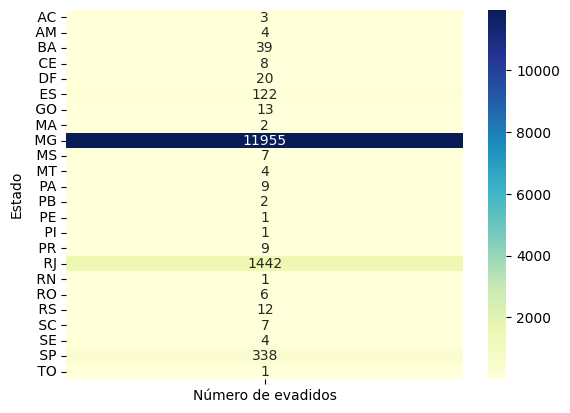

In [29]:
# Use pivot_table para criar uma tabela agregada
heatmap_data = evadidos_por_estado.pivot_table(index='Estado', aggfunc='sum')

# Crie o mapa de calor com o Seaborn
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu')

# Exiba o mapa de calor
plt.show()